In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models 
import potential_sweeps as sweep
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 0.1
ion_diameter_m = 10e-10
solvent_diameter_m = 2.75e-10
potentials = np.linspace(-0.75, 0.75, 100)

In [3]:
gc_asol = sweep.gouy_chapman(ion_concentration_molar, potentials)
borukhov_asol = sweep.borukhov(ion_concentration_molar, ion_diameter_m, potentials)

In [4]:
gc = models.GouyChapman(ion_concentration_molar)
gc_nsol = sweep.numerical(gc, potentials, force_recalculation=False)

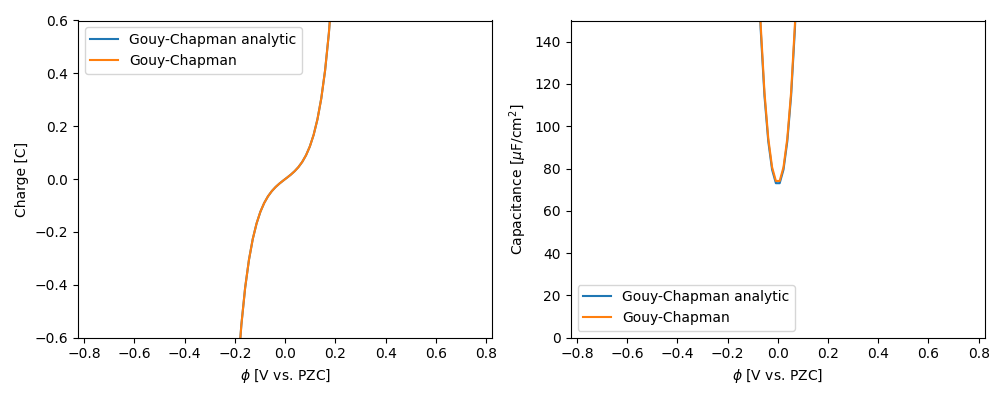

In [5]:
fig, ax = plotting.plot_potential_sweep([gc_asol, gc_nsol])
plt.show()

In [6]:
borukhov = models.Borukhov(ion_concentration_molar, ion_diameter_m)
borukhov_nsol = sweep.numerical(borukhov, potentials, force_recalculation=False)

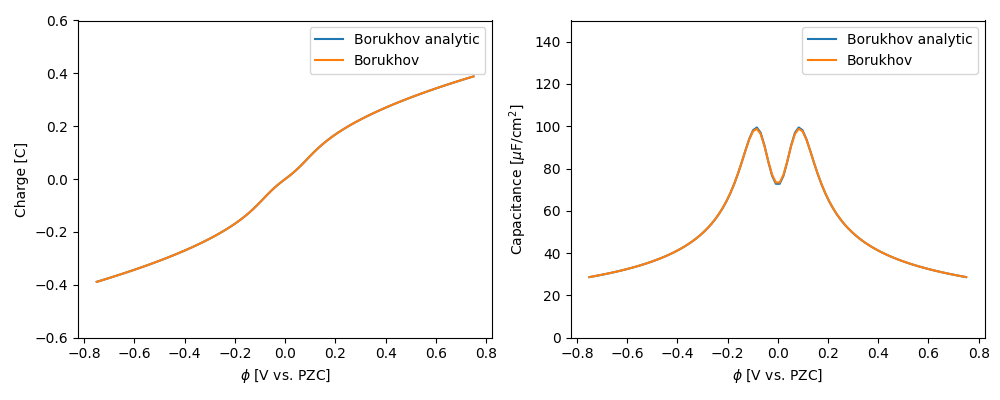

In [7]:
fig, ax = plotting.plot_potential_sweep([borukhov_asol, borukhov_nsol])
plt.show()

In [8]:
abrashkin = models.Abrashkin(ion_concentration_molar, ion_diameter_m, eps_r_opt=30)
abrashkin_nsol = sweep.numerical(abrashkin, potentials, force_recalculation=False)

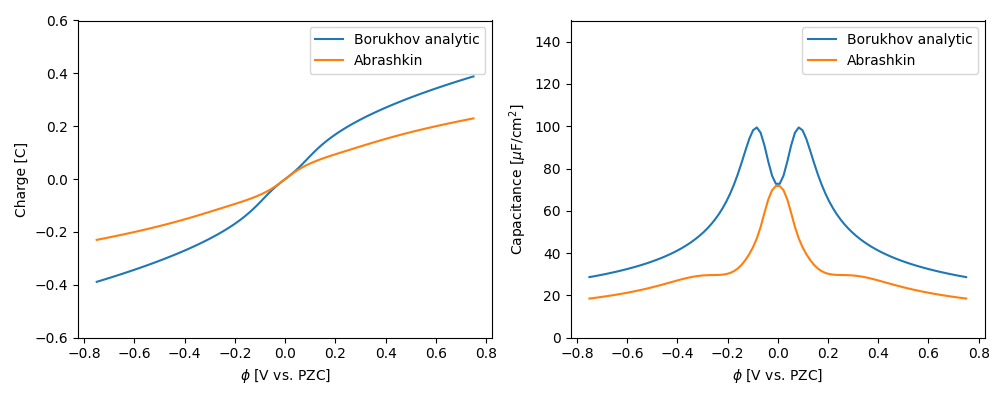

In [9]:
fig, ax = plotting.plot_potential_sweep([borukhov_asol, abrashkin_nsol])
plt.show()

In [10]:
simple = models.HuangSimple(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
simple_nsol = sweep.numerical(simple, potentials, force_recalculation=False)

In [11]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, solvent_diameter_m, eps_r_opt=1)
huang_nsol = sweep.numerical(huang, potentials, force_recalculation=True)

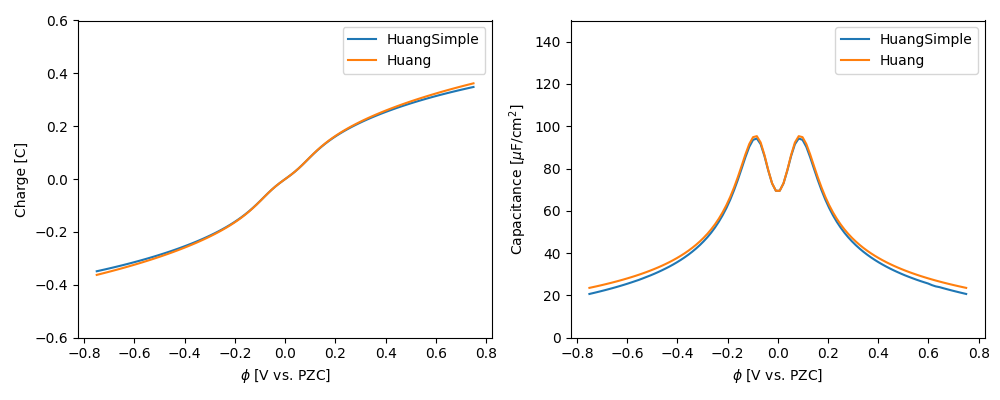

In [12]:
fig, ax = plotting.plot_potential_sweep([simple_nsol, huang_nsol])
plt.show()

In [13]:
H = models.Species(1e-1, 10e-10, +1, r'H$^+$')
ClO4 = models.Species(1e-1, 10e-10, -1, r'ClO$_4^-$')
species_list = [H, ClO4]
charge_densities = [s.charge * s.c_0 for s in species_list]
water = models.Solvent(2.75e-10, r'H$_2$O')

multi = models.Multispecies(species_list, water, eps_r_opt=1)
multi_nsol = sweep.numerical(multi, potentials, force_recalculation=False)

multi_nowater = models.Multispecies(species_list, water, eps_r_opt=78.5)
multi_nowater_nsol = sweep.numerical(multi_nowater, potentials, force_recalculation=False)

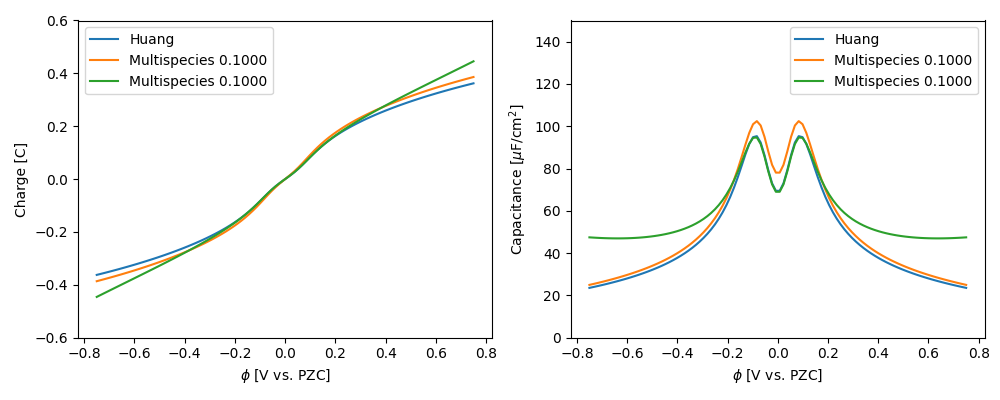

In [14]:
fig, ax = plotting.plot_potential_sweep([huang_nsol, multi_nsol, multi_nowater_nsol])

plt.show()